In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


In [ ]:
unzip_data("cars_image_dataset.zip")

In [ ]:
walk_through_dir("Cars_Dataset")

There are 2 directories and 0 images in 'Cars_Dataset'.
There are 7 directories and 0 images in 'Cars_Dataset/train'.
There are 0 directories and 814 images in 'Cars_Dataset/train/Audi'.
There are 0 directories and 775 images in 'Cars_Dataset/train/Toyota Innova'.
There are 0 directories and 316 images in 'Cars_Dataset/train/Mahindra Scorpio'.
There are 0 directories and 424 images in 'Cars_Dataset/train/Swift'.
There are 0 directories and 441 images in 'Cars_Dataset/train/Tata Safari'.
There are 0 directories and 271 images in 'Cars_Dataset/train/Hyundai Creta'.
There are 0 directories and 311 images in 'Cars_Dataset/train/Rolls Royce'.
There are 7 directories and 0 images in 'Cars_Dataset/test'.
There are 0 directories and 199 images in 'Cars_Dataset/test/Audi'.
There are 0 directories and 190 images in 'Cars_Dataset/test/Toyota Innova'.
There are 0 directories and 75 images in 'Cars_Dataset/test/Mahindra Scorpio'.
There are 0 directories and 102 images in 'Cars_Dataset/test/Swift'.


In [ ]:
train_dir = "Cars_Dataset/train/"
test_dir = "Cars_Dataset/test/"

# Fine Tuning with All Dataset

In [ ]:
import tensorflow as tf
IMG_SIZE = (128, 128) # define image size
train_data_Cars_Dataset = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_Cars_Dataset = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


In [ ]:
train_data_Cars_Dataset.class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [ ]:
for images, labels in train_data_Cars_Dataset.take(1):
  print(images, labels)

tf.Tensor(
[[[[113.78162   121.78162   110.78162  ]
   [ 75.98132    83.98132    72.98132  ]
   [109.31326   117.31326   104.5242   ]
   ...
   [208.98381   213.36272   221.226    ]
   [209.83974   214.21864   222.08192  ]
   [204.68817   209.06708   217.70187  ]]

  [[109.84512   117.84512   106.84512  ]
   [ 89.53659    97.53659    86.53659  ]
   [103.82182   111.82182    99.03276  ]
   ...
   [191.5137    197.5137    196.96683  ]
   [156.8999    162.8999    162.35303  ]
   [189.1265    195.34813   191.7369   ]]

  [[ 91.368515   99.368515   88.368515 ]
   [ 78.11624    86.11624    75.11624  ]
   [ 70.613846   78.613846   65.82478  ]
   ...
   [151.42485   158.31938   150.74126  ]
   [134.21307   141.1076    133.52948  ]
   [134.56252   143.07814   126.98439  ]]

  ...

  [[161.15056   166.15056   169.15056  ]
   [171.59105   176.59105   179.59105  ]
   [154.32288   159.32288   162.32288  ]
   ...
   [181.65506   186.65506   189.65506  ]
   [165.19121   170.19121   173.19121  ]
   [1

In [ ]:

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(128, 128, 3), name="input_layer")

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)



outputs = tf.keras.layers.Dense(7, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.experimental.SGD(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_1 = model.fit(train_data_Cars_Dataset,
                                 epochs=10,
                                 steps_per_epoch=len(train_data_Cars_Dataset),
                                 validation_data=test_data_Cars_Dataset,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_Cars_Dataset)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "Cars_Dataset_feature_extract")])

Saving TensorBoard log files to: transfer_learning/Cars_Dataset_feature_extract/20231022-153407
Epoch 1/10
105/105 [==============================] - 12s 51ms/step - loss: 1.6031 - accuracy: 0.4177 - val_loss: 1.3057 - val_accuracy: 0.5729
Epoch 2/10
105/105 [==============================] - 3s 26ms/step - loss: 1.2454 - accuracy: 0.6002 - val_loss: 1.0630 - val_accuracy: 0.6875
Epoch 3/10
105/105 [==============================] - 3s 31ms/step - loss: 1.0753 - accuracy: 0.6590 - val_loss: 0.9970 - val_accuracy: 0.6823
Epoch 4/10
105/105 [==============================] - 3s 27ms/step - loss: 0.9844 - accuracy: 0.6912 - val_loss: 0.8964 - val_accuracy: 0.6927
Epoch 5/10
105/105 [==============================] - 3s 26ms/step - loss: 0.9098 - accuracy: 0.7100 - val_loss: 0.8430 - val_accuracy: 0.7448
Epoch 6/10
105/105 [==============================] - 4s 37ms/step - loss: 0.8498 - accuracy: 0.7300 - val_loss: 0.7700 - val_accuracy: 0.7865
Epoch 7/10
105/105 [=========================

In [ ]:
results_Cars_Dataset = model.evaluate(test_data_Cars_Dataset)
results_Cars_Dataset

26/26 [==============================] - 1s 25ms/step - loss: 0.6843 - accuracy: 0.7774


[0.6843142509460449, 0.7773677706718445]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_3
1 rescaling_2
2 normalization_2
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, None, None, 3)        0         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 7)                 8967      
                                                                 
Total params: 5928279 (22.61 MB)
Trainable params: 8967 (35.03 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________

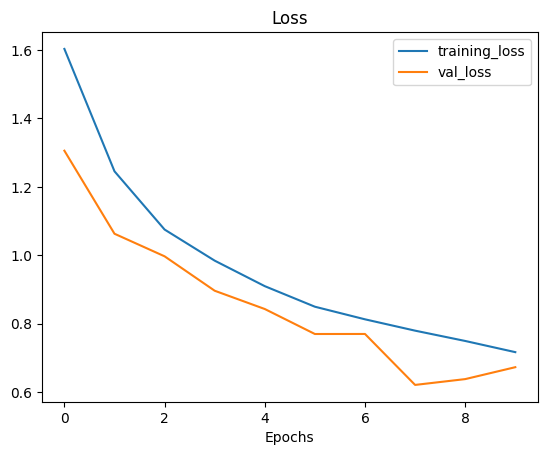

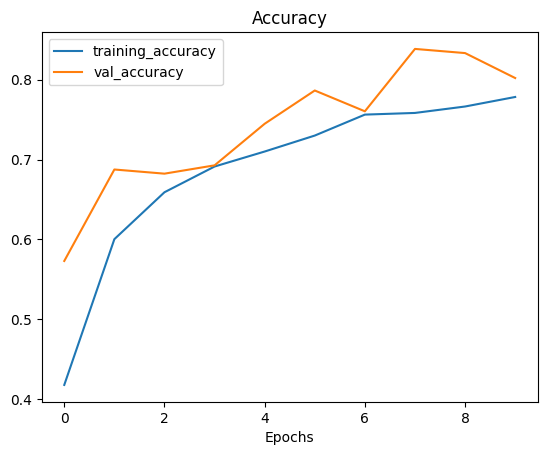

In [ ]:
plot_loss_curves(history_1)

In [ ]:
unzip_data("cars_image_dataset.zip")

walk_through_dir("Cars_Dataset")
train_dir = "Cars_Dataset/train/"
test_dir = "Cars_Dataset/test/"



There are 2 directories and 0 images in 'Cars_Dataset'.
There are 7 directories and 0 images in 'Cars_Dataset/train'.
There are 0 directories and 814 images in 'Cars_Dataset/train/Audi'.
There are 0 directories and 775 images in 'Cars_Dataset/train/Toyota Innova'.
There are 0 directories and 316 images in 'Cars_Dataset/train/Mahindra Scorpio'.
There are 0 directories and 424 images in 'Cars_Dataset/train/Swift'.
There are 0 directories and 441 images in 'Cars_Dataset/train/Tata Safari'.
There are 0 directories and 271 images in 'Cars_Dataset/train/Hyundai Creta'.
There are 0 directories and 311 images in 'Cars_Dataset/train/Rolls Royce'.
There are 7 directories and 0 images in 'Cars_Dataset/test'.
There are 0 directories and 199 images in 'Cars_Dataset/test/Audi'.
There are 0 directories and 190 images in 'Cars_Dataset/test/Toyota Innova'.
There are 0 directories and 75 images in 'Cars_Dataset/test/Mahindra Scorpio'.
There are 0 directories and 102 images in 'Cars_Dataset/test/Swift'.


In [ ]:
import tensorflow as tf
IMG_SIZE = (128, 128) # define image size
train_data_Cars_Dataset = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_Cars_Dataset = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


**data_augmentation**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

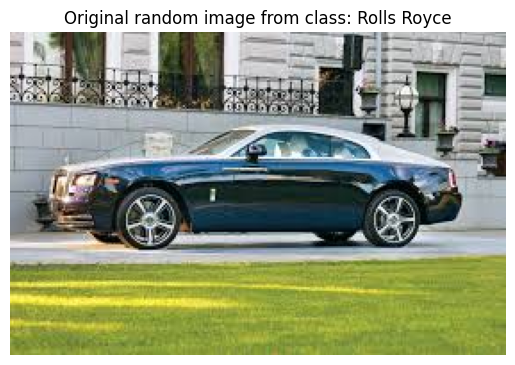

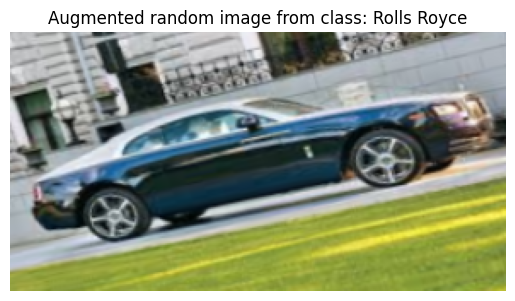

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_Cars_Dataset.class_names) # choose a random class
target_dir = "Cars_Dataset/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False) # turn off the axes
plt.show()

augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation ???
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)
plt.show()

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(128,128,3), name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(7, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
initial_epochs = 10
history_2 = model_1.fit(train_data_Cars_Dataset,
                    epochs=initial_epochs,
                    steps_per_epoch=len(train_data_Cars_Dataset),
                    validation_data=test_data_Cars_Dataset,
                    validation_steps=int(0.25* len(test_data_Cars_Dataset)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "Cars_Dataset_aug")])

Saving TensorBoard log files to: transfer_learning/Cars_Dataset_aug/20231022-153557
Epoch 1/10
105/105 [==============================] - 15s 64ms/step - loss: 1.5892 - accuracy: 0.4120 - val_loss: 1.2237 - val_accuracy: 0.5729
Epoch 2/10
105/105 [==============================] - 5s 47ms/step - loss: 1.2679 - accuracy: 0.5513 - val_loss: 1.0242 - val_accuracy: 0.6198
Epoch 3/10
105/105 [==============================] - 5s 44ms/step - loss: 1.1425 - accuracy: 0.6077 - val_loss: 0.8302 - val_accuracy: 0.7240
Epoch 4/10
105/105 [==============================] - 6s 57ms/step - loss: 1.0627 - accuracy: 0.6375 - val_loss: 0.7999 - val_accuracy: 0.7292
Epoch 5/10
105/105 [==============================] - 6s 53ms/step - loss: 1.0189 - accuracy: 0.6539 - val_loss: 0.7768 - val_accuracy: 0.7135
Epoch 6/10
105/105 [==============================] - 5s 45ms/step - loss: 0.9723 - accuracy: 0.6680 - val_loss: 0.7851 - val_accuracy: 0.6927
Epoch 7/10
105/105 [==============================] - 6s 

In [ ]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 7)                 8967

In [ ]:
results_Cars_Dataset_aug = model_1.evaluate(test_data_Cars_Dataset)
results_Cars_Dataset_aug

26/26 [==============================] - 1s 28ms/step - loss: 0.6611 - accuracy: 0.7724


[0.6610731482505798, 0.7724477052688599]

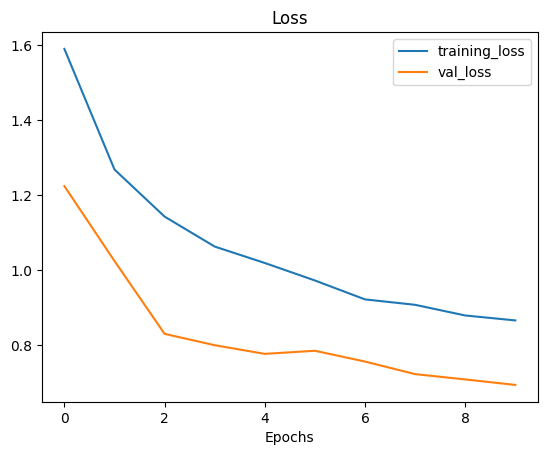

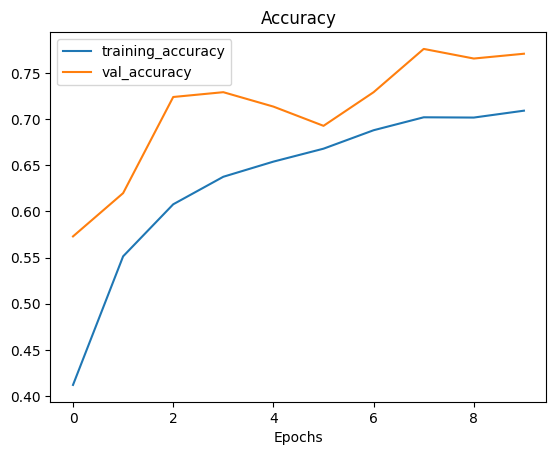

In [ ]:
plot_loss_curves(history_2)

**Model Checkpoint**

In [ ]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
initial_epochs = 10
history_2 = model_1.fit(train_data_Cars_Dataset,
                        epochs=initial_epochs,
                        validation_data=test_data_Cars_Dataset,
                        validation_steps=int(0.25 * len(test_data_Cars_Dataset)), # do less steps per validation (quicker)
                        callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                        checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231022-153741
Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 0.8555 - accuracy: 0.7130
Epoch 1: val_loss improved from inf to 0.61513, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
105/105 [==============================] - 5s 46ms/step - loss: 0.8555 - accuracy: 0.7130 - val_loss: 0.6151 - val_accuracy: 0.7917
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.8454 - accuracy: 0.7178
Epoch 2: val_loss did not improve from 0.61513
105/105 [==============================] - 4s 41ms/step - loss: 0.8454 - accuracy: 0.7178 - val_loss: 0.6285 - val_accuracy: 0.7865
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.8220 - accuracy: 0.7232
Epoch 3: val_loss did not improve from 0.61513
105/105 [==============================] - 5s 46ms/step - loss: 0.8220 - accuracy: 0.7232 - val_loss: 0.6464 - val_accuracy: 0.8021
Epoch 4/10
105/10

In [ ]:
results_Cars_Dataset_aug_cp = model_1.evaluate(test_data_Cars_Dataset)
results_Cars_Dataset_aug_cp

26/26 [==============================] - 1s 24ms/step - loss: 0.5576 - accuracy: 0.8278


[0.5576029419898987, 0.8277983069419861]

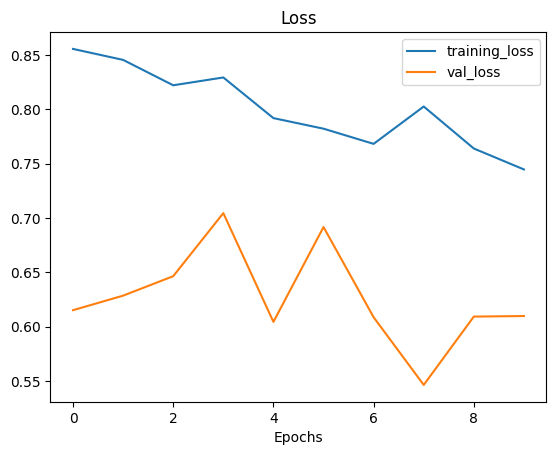

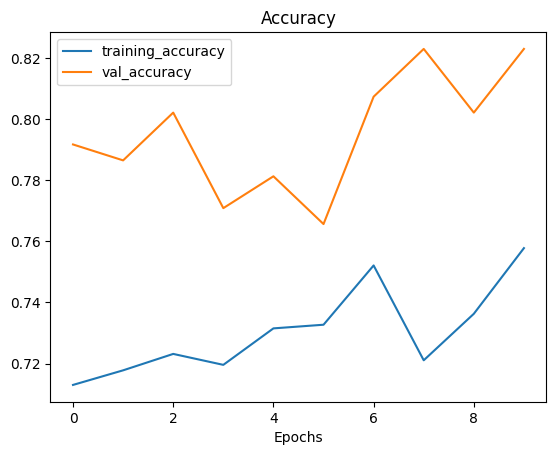

In [ ]:
plot_loss_curves(history_2)

**Fine Tuning**

In [ ]:
model_1.layers

In [ ]:
for layer_number, layer in enumerate(model_1.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")

Layer number: 0 | Layer name: input_layer | Layer type: <keras.src.engine.input_layer.InputLayer object at 0x7e023033ac50> | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Layer type: <keras.src.engine.sequential.Sequential object at 0x7e02661f1240> | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Layer type: <keras.src.engine.functional.Functional object at 0x7e0207756260> | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Layer type: <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7e023033af80> | Trainable? True
Layer number: 4 | Layer name: output_layer | Layer type: <keras.src.layers.core.dense.Dense object at 0x7e0207757640> | Trainable? True


In [ ]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 7)                 8967

In [ ]:
model_1_base_model = model_1.layers[2]
model_1_base_model.name

'efficientnetv2-b0'

In [ ]:
print(len(model_1_base_model.trainable_variables))

0


In [ ]:
model_1_base_model.trainable = True

for layer in model_1_base_model.layers[:-20]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustments to a model)
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [ ]:
for layer_number, layer in enumerate(model_1_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
print(len(model_1.trainable_variables))

18


In [ ]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_2_aug = model_1.fit(train_data_Cars_Dataset,
                                epochs=fine_tune_epochs,
                                validation_data=test_data_Cars_Dataset,
                                initial_epoch=history_2.epoch[-1], # start from previous last epoch
                                validation_steps=int(0.25 * len(test_data_Cars_Dataset)),
                                callbacks=[create_tensorboard_callback("transfer_learning", "Cars_Dataset_fine_tune")]) # name experiment appropriately

Saving TensorBoard log files to: transfer_learning/Cars_Dataset_fine_tune/20231022-153950
Epoch 10/15
105/105 [==============================] - 16s 69ms/step - loss: 0.7244 - accuracy: 0.7476 - val_loss: 0.5912 - val_accuracy: 0.7969
Epoch 11/15
105/105 [==============================] - 5s 45ms/step - loss: 0.6663 - accuracy: 0.7733 - val_loss: 0.5243 - val_accuracy: 0.8281
Epoch 12/15
105/105 [==============================] - 6s 51ms/step - loss: 0.6366 - accuracy: 0.7697 - val_loss: 0.5402 - val_accuracy: 0.8229
Epoch 13/15
105/105 [==============================] - 4s 41ms/step - loss: 0.6125 - accuracy: 0.7831 - val_loss: 0.4634 - val_accuracy: 0.8385
Epoch 14/15
105/105 [==============================] - 5s 49ms/step - loss: 0.5625 - accuracy: 0.8091 - val_loss: 0.4564 - val_accuracy: 0.8438
Epoch 15/15
105/105 [==============================] - 5s 45ms/step - loss: 0.5530 - accuracy: 0.8109 - val_loss: 0.4949 - val_accuracy: 0.8646


In [ ]:
results_fine_tune = model_1.evaluate(test_data_Cars_Dataset)

26/26 [==============================] - 1s 43ms/step - loss: 0.4572 - accuracy: 0.8524


In [ ]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

     # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

10
16
[0.7130071520805359, 0.7177804112434387, 0.723150372505188, 0.7195703983306885, 0.7315036058425903, 0.7326968908309937, 0.7520883083343506, 0.7210620641708374, 0.7362768650054932, 0.7577565908432007, 0.7476133704185486, 0.7732697129249573, 0.7696897387504578, 0.7831145524978638, 0.8090692162513733, 0.810859203338623]


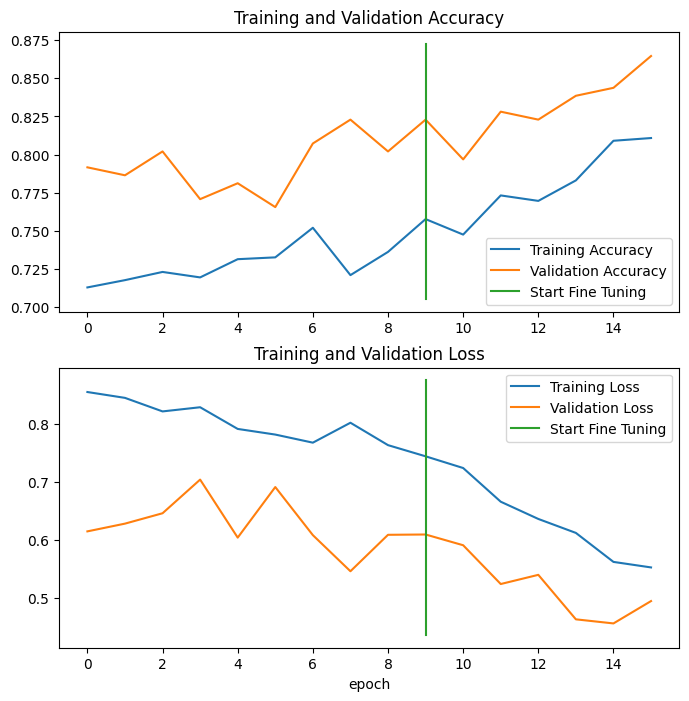

In [ ]:
compare_historys(original_history=history_2,
                 new_history=history_fine_2_aug,
                 initial_epochs=10)